In [79]:
pip install imbalanced-learn xgboost tensorflow keras numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
accuracy_score,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score, classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE  # Handling Imbalanced Data
from collections import Counter
from xgboost import XGBClassifier
import xgboost as xgb # XGBoost

# Load the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\rinis\Downloads\credit_card_fraud_detection_dataset\creditcard.csv')

In [26]:
print ("\n Dataset info:")
print (df.info())


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64

# Initial Data Overview

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format) # Format Data for Better Readability

In [50]:
print ("\nFirst 5 rows:")
print (df.head())


First 5 rows:
   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]


In [25]:
print (df.describe())

           Time        V1        V2        V3        V4        V5        V6  \
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00   
mean   94813.86      0.00      0.00     -0.00      0.00      0.00      0.00   
std    47488.15      1.96      1.65      1.52      1.42      1.38      1.33   
min        0.00    -56.41    -72.72    -48.33     -5.68   -113.74    -26.16   
25%    54201.50     -0.92     -0.60     -0.89     -0.85     -0.69     -0.77   
50%    84692.00      0.02      0.07      0.18     -0.02     -0.05     -0.27   
75%   139320.50      1.32      0.80      1.03      0.74      0.61      0.40   
max   172792.00      2.45     22.06      9.38     16.88     34.80     73.30   

             V7        V8        V9  ...       V21       V22       V23  \
count 284807.00 284807.00 284807.00  ... 284807.00 284807.00 284807.00   
mean      -0.00      0.00     -0.00  ...      0.00     -0.00      0.00   
std        1.24      1.19      1.10  ...      0.73      0.73      

In [48]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (284807, 31)


# Check For Class Imbalance

In [14]:
print('\n Class Distribution:' , df['Class'].value_counts())


 Class Distribution: Class
0    284315
1       492
Name: count, dtype: int64


# Class Distribution

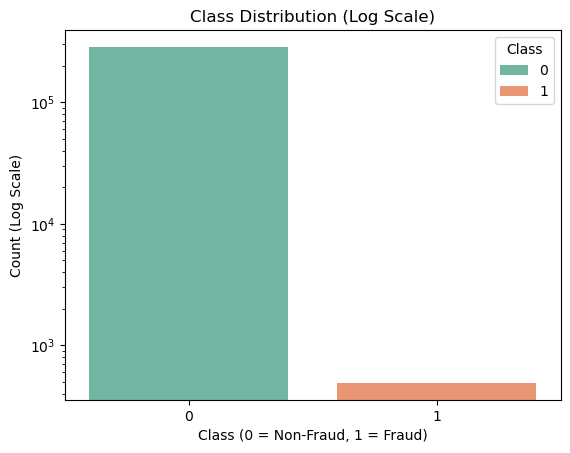

In [5]:
plt.figure()
sns.countplot(x='Class', hue='Class', data=df, palette='Set2')
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Class Distribution (Log Scale)')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count (Log Scale)')
plt.savefig('class_distribution_log.png')
plt.show()

# Boxplot of Amount by Class

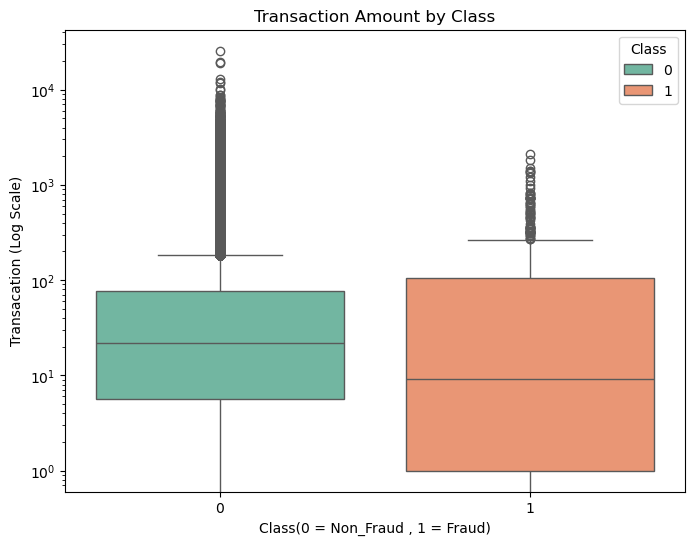

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Class', y = 'Amount', hue= 'Class', data = df, palette = 'Set2',)
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Transaction Amount by Class')
plt.xlabel('Class(0 = Non_Fraud , 1 = Fraud)')
plt.ylabel('Transacation (Log Scale)')
plt.savefig('amount_by_class_boxplot.png')
plt.show()

# Correlation Heatmap

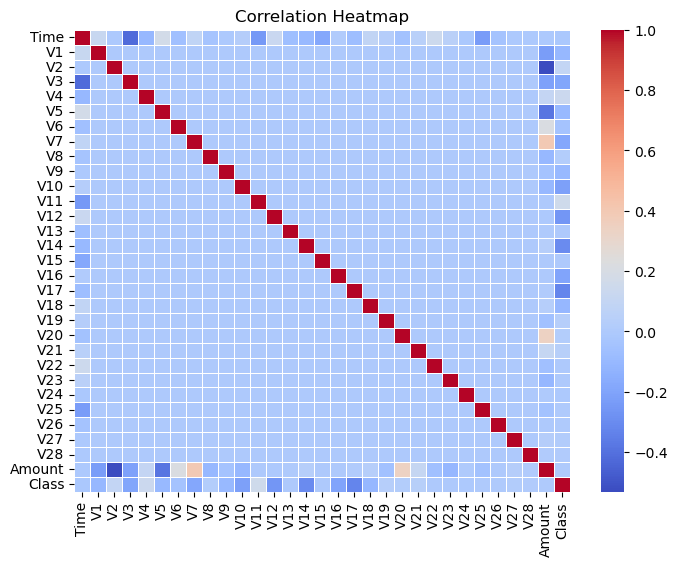

In [35]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidth =0.5)
plt.title('Correlation Heatmap')
plt.savefig('Correlation_heatmap.png')
plt.show()

# Histogram V1,V2,V3 and Amount

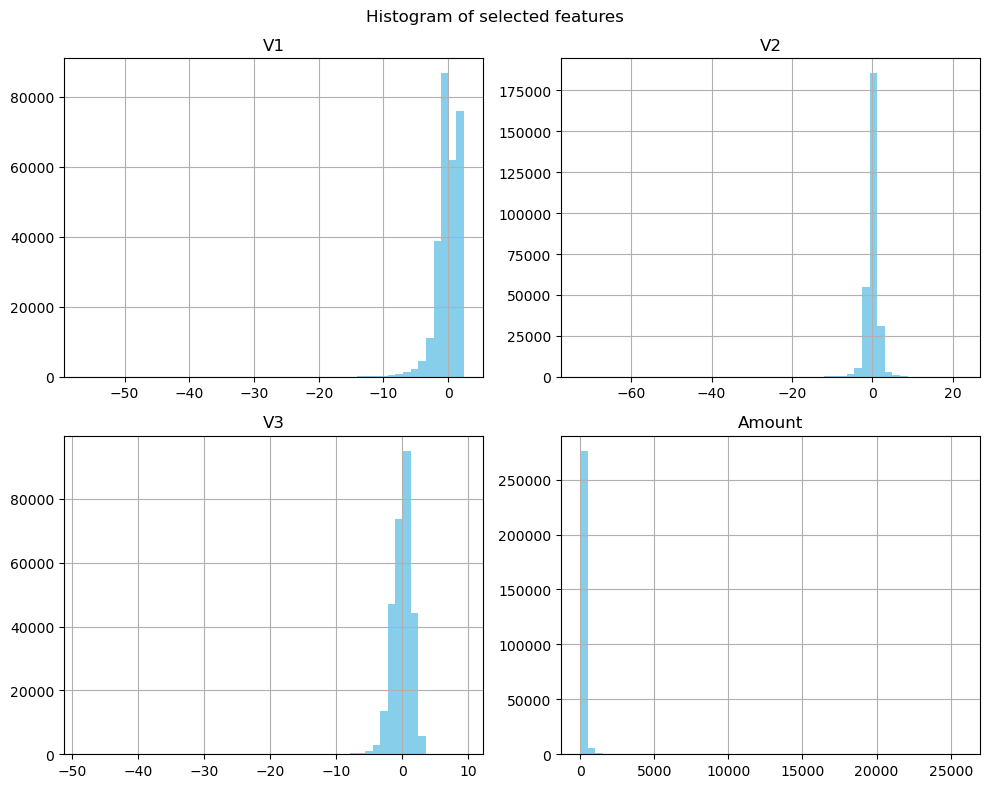

In [44]:
Features = ['V1','V2','V3', 'Amount']
df[Features].hist(bins=50, figsize= (10,8),color= 'skyblue')
plt.suptitle('Histogram of selected features')
plt.tight_layout()
plt.savefig('Histogram_features.png')
plt.show()

# Data Preprocessing

In [5]:
x= df.drop(['Class'], axis = 1)
y= df['Class']

# Scale Time and Amount

In [15]:
scaler = StandardScaler()
x[['Time' , 'Amount']] = scaler.fit_transform(x[['Time' , 'Amount']])

#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

# Model Training and Evaluation

In [17]:
# Logistic regression

#Initialize model
model= LogisticRegression()

#train model
model.fit(x_train,y_train)

#Predict

y_pred_lr = model.predict(x_test)
y_prob_lr = model.predict_proba(x_test) [:,1]

#Evaluate Metrics
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print("Precision:", precision_score(y_test,y_pred_lr))
print("Recall:", recall_score(y_test,y_pred_lr))
print("F1:", f1_score(y_test,y_pred_lr))
print("AUC Score:", roc_auc_score(y_test,y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test,y_pred_lr))

Accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1: 0.7241379310344828
AUC Score: 0.9572835078037969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
# K-Nearest Neighbor

#Initialize model
model_knn= KNeighborsClassifier(n_neighbors=3)

#train model
model_knn.fit(x_train,y_train)

#Predict

y_pred_knn = model_knn.predict(x_test)
y_prob_knn = model_knn.predict_proba(x_test) [:,1]

#Evaluate Metrics
print("Accuracy:", accuracy_score(y_test,y_pred_knn))
print("Precision:", precision_score(y_test,y_pred_knn))
print("Recall:", recall_score(y_test,y_pred_knn))
print("F1:", f1_score(y_test,y_pred_knn))
print("AUC Score:", roc_auc_score(y_test,y_prob_knn))
print("\nClassification Report:\n", classification_report(y_test,y_pred_knn))

Accuracy: 0.9995786664794073
Precision: 0.9204545454545454
Recall: 0.826530612244898
F1: 0.8709677419354839
AUC Score: 0.9284791927463163

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
# Decision Tree

#Define Hyperparameters

param_dist = {
    'max_depth': [3,5,10,15,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,5]
}

#Initialize model
dt= DecisionTreeClassifier(random_state=42,class_weight='balanced')

#Run GridsearchCV
rand_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=10,cv=3,scoring='roc_auc',n_jobs= -1,random_state=42,verbose=1)

#train model
rand_search.fit(x_train,y_train)
best_dt=rand_search.best_estimator_

#Predict

y_pred_dt = best_dt.predict(x_test)
y_prob_dt = best_dt.predict_proba(x_test) [:,1]

#Evaluate Metrics
print("Accuracy:", accuracy_score(y_test,y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt))
print("Recall:", recall_score(y_test,y_pred_dt))
print("F1:", f1_score(y_test,y_pred_dt))
print("AUC Score:", roc_auc_score(y_test,y_prob_dt))
print("\nClassification Report:\n", classification_report(y_test,y_pred_dt))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.955672202520979
Precision: 0.03344867358708189
Recall: 0.8877551020408163
F1: 0.0644683216005928
AUC Score: 0.9456269810963214

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.89      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962



# Random Forest

In [23]:
#SMOTE SYNTHETIC MONITORING OVERSAMPLING TECHNIQUE: Due to the severe class imbalance in the dataset with fraud cases being a small minority I applied smote to balance the training data.

#check for class distribution before SMOTE
print("Before SMOTE:",Counter(y_train))

#Initialize smote
sm = SMOTE(random_state=42)

#Apply smote to training data only

x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

#check for class distribution after SMOTE
print("After SMOTE:",Counter(y_train_res))
    

      
#Initialize Model
rf_smote=RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=50,n_jobs=-1)

#Train Model
rf_smote.fit(x_train_res,y_train_res)

#prediction
y_pred_rf=rf_smote.predict(x_test)
y_prob_rf=rf_smote.predict_proba(x_test)[:,1]

#Evaluate Metrics
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("Precision:", precision_score(y_test,y_pred_rf))
print("Recall:", recall_score(y_test,y_pred_rf))
print("F1:", f1_score(y_test,y_pred_rf))
print("AUC Score:", roc_auc_score(y_test,y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test,y_pred_rf))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})
Accuracy: 0.9994382219725431
Precision: 0.8367346938775511
Recall: 0.8367346938775511
F1: 0.8367346938775511
AUC Score: 0.9603563604676537

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# SUPPORT VECTOR MACHINE
# Scale all features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train SVM
svm = SVC(probability=True, class_weight='balanced', random_state=42)
svm.fit(x_train_scaled, y_train)

# Predict
y_pred_svm = svm.predict(x_test_scaled)
y_prob_svm = svm.predict_proba(x_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_prob_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

In [25]:
# Naive Bayes

#Initialize Model
nb=GaussianNB()

nb.fit(x_train,y_train)

#prediction
y_pred_nb=nb.predict(x_test)
y_prob_nb=nb.predict_proba(x_test)[:,1]

#Evaluate Metrics
print("Accuracy:", accuracy_score(y_test,y_pred_nb))
print("Precision:", precision_score(y_test,y_pred_nb))
print("Recall:", recall_score(y_test,y_pred_nb))
print("F1:", f1_score(y_test,y_pred_nb))
print("AUC Score:", roc_auc_score(y_test,y_prob_nb))
print("\nClassification Report:\n", classification_report(y_test,y_pred_nb))

Accuracy: 0.9764053228468101
Precision: 0.058781869688385266
Recall: 0.8469387755102041
F1: 0.10993377483443709
AUC Score: 0.9631829219448049

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [27]:
# XGBoost Classifier

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to training data only
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_res))

# Initialize XGBoost classifier (without scale_pos_weight)
xgb_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on SMOTE data
xgb_smote.fit(x_train_res, y_train_res)

# Prediction on test data
y_pred_smote = xgb_smote.predict(x_test)
y_prob_smote = xgb_smote.predict_proba(x_test)[:, 1]

# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1:", f1_score(y_test, y_pred_smote))
print("AUC Score:", roc_auc_score(y_test, y_prob_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


C:\Users\rinis\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9992451107756047
Precision: 0.7310924369747899
Recall: 0.8877551020408163
F1: 0.8018433179723502
AUC Score: 0.9791588308086319

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# Roc_curve for all models

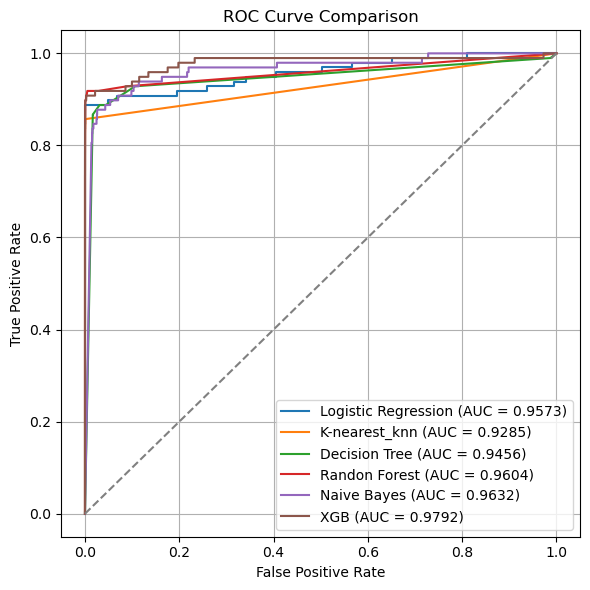

In [39]:
# Calculate ROC curve and AUC for each model
models = {
    "Logistic Regression": y_prob_lr ,
    "K-nearest_knn": y_prob_knn ,
    "Decision Tree": y_prob_dt , 
    "Randon Forest": y_prob_rf ,
    "Naive Bayes": y_prob_nb ,
    "XGB": y_prob_smote
}

plt.figure(figsize=(6,6))

for name, y_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Plot formatting
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Summary of ROC Curve Comparison
"""
The Receiver Operating Characteristic (ROC) curve compares various machine learning models' performance.
The key metric is the Area Under the Curve (AUC), which indicates the model's ability to distinguish between classes.

- XGB shows the **highest performance** with an **AUC = 0.9792**.
- SVM follows closely with **AUC = 0.9732**.
- Random Forest (AUC = 0.9604) and Naive Bayes (AUC = 0.9632) also perform well.
- K-Nearest Neighbors has the lowest performance with **AUC = 0.9285**.

This suggests that **XGB is the most effective classification model in this context**.
"""
